In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [2]:
df_imputed = pd.read_csv("../data/hpms_aadt_imputed.csv")
df_subset = pd.read_csv("../data/hpms_aadt_subset.csv")

df_imputed.set_index('FID_Link_Cnty_Intxn', inplace=True)
df_subset.set_index('FID_Link_Cnty_Intxn', inplace=True)

/tmp/ipykernel_106243/4244539808.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_imputed = pd.read_csv("../data/hpms_aadt_imputed.csv")
/tmp/ipykernel_106243/4244539808.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_subset = pd.read_csv("../data/hpms_aadt_subset.csv")


### Subset the data for given State

In [3]:
STATE = 11

In [4]:
# filter for DC by statefps
df_imputed_state = df_imputed[df_imputed['STATEFP'] == STATE]
df_subset_state = df_subset[df_subset['STATEFP'] == STATE]


## Data Checks

In [5]:
print(sum(df_imputed_state.AADT_MDV.isna())) # check no missing
print(sum(df_imputed_state.AADT_HDV.isna()))
print((len(df_imputed_state) == len(df_subset_state))) # confirm same length


0
0
True


## Merge Data

In [6]:
PREDICTOR_VARS = [ "COUNTYFP", "F_SYSTEM", "THROUGH_LANES", "AADT"]
RESPONSE_VARS = [ "AADT_MDV", "AADT_HDV"]

In [9]:
# Find all the imputed values
missing_aadt_mdv = df_subset_state[df_subset_state.AADT_MDV.isna()]
missing_aadt_mdv = df_subset_state[df_subset_state.AADT_HDV.isna()]

imputed_aadt_mdv = df_imputed_state[PREDICTOR_VARS + RESPONSE_VARS]
imputed_aadt_mdv = imputed_aadt_mdv[(imputed_aadt_mdv.index.isin(missing_aadt_mdv.index))]
imputed_aadt_hdv = df_imputed_state[PREDICTOR_VARS + RESPONSE_VARS]
imputed_aadt_hdv = imputed_aadt_hdv[(imputed_aadt_hdv.index.isin(missing_aadt_mdv.index))]

# Find all the observed values
observed_aadt_mdv = df_subset_state[df_subset_state.AADT_MDV.notna()]
observed_aadt_mdv = observed_aadt_mdv[PREDICTOR_VARS + RESPONSE_VARS]
observed_aadt_hdv = df_subset_state[df_subset_state.AADT_HDV.notna()]
observed_aadt_hdv = observed_aadt_hdv[PREDICTOR_VARS + RESPONSE_VARS]

## Plotting

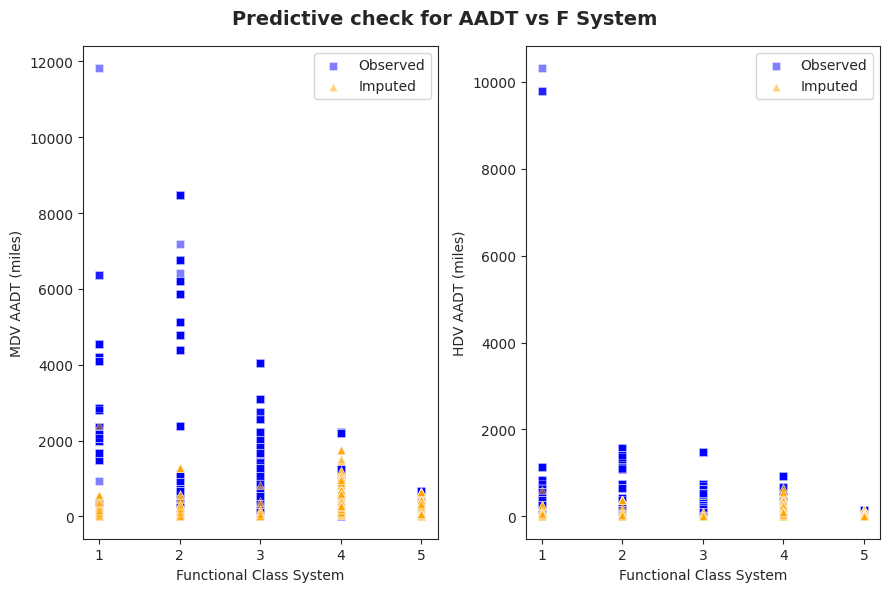

In [11]:
# Set the style to a nicer font
sns.set_style("ticks")

# Create the scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

# Scatter plot for MDV AADT
sns.scatterplot(data=observed_aadt_mdv, y='AADT_MDV', x='F_SYSTEM', marker='s', color='blue', label='Observed', ax=ax1, alpha=0.5)
sns.scatterplot(data=imputed_aadt_mdv, y='AADT_MDV', x='F_SYSTEM', marker='^', color='orange', label='Imputed', ax=ax1, alpha=0.5)
ax1.set_xlabel('Functional Class System')
ax1.set_ylabel('MDV AADT (miles)')
ax1.set_xticks([1, 2, 3, 4, 5])
ax1.legend()

# Scatter plot for HDV AADT
sns.scatterplot(data=observed_aadt_hdv, y='AADT_HDV', x='F_SYSTEM', marker='s', color='blue', label='Observed', ax=ax2, alpha=0.5)
sns.scatterplot(data=imputed_aadt_hdv, y='AADT_HDV', x='F_SYSTEM', marker='^', color='orange', label='Imputed', ax=ax2, alpha=0.5)
ax2.set_xlabel('Functional Class System')
ax2.set_ylabel('HDV AADT (miles)')
ax2.set_xticks([1, 2, 3, 4, 5])
ax2.legend()

# Centered title
fig.suptitle('Predictive check for AADT vs F System', fontsize=14, fontweight='bold')

# Adjust the layout
plt.tight_layout()

plt.savefig("../figs/aadt_fsystem.png")
# Show the plot
plt.show()


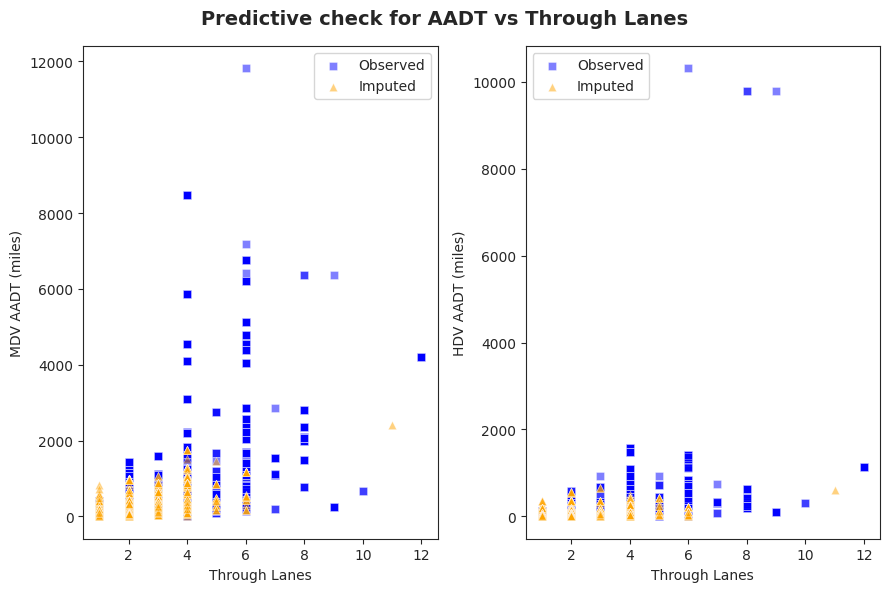

In [15]:
# Set the style to a nicer font
sns.set_style("ticks")

# Create the scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

# Scatter plot for MDV AADT
sns.scatterplot(data=observed_aadt_mdv, y='AADT_MDV', x='THROUGH_LANES', marker='s', color='blue', label='Observed', ax=ax1, alpha=0.5)
sns.scatterplot(data=imputed_aadt_mdv, y='AADT_MDV', x='THROUGH_LANES', marker='^', color='orange', label='Imputed', ax=ax1, alpha=0.5)
ax1.set_xlabel('Through Lanes')
ax1.set_ylabel('MDV AADT (miles)')
ax1.legend()

# Scatter plot for HDV AADT
sns.scatterplot(data=observed_aadt_hdv, y='AADT_HDV', x='THROUGH_LANES', marker='s', color='blue', label='Observed', ax=ax2, alpha=0.5)
sns.scatterplot(data=imputed_aadt_hdv, y='AADT_HDV', x='THROUGH_LANES', marker='^', color='orange', label='Imputed', ax=ax2, alpha=0.5)
ax2.set_xlabel('Through Lanes')
ax2.set_ylabel('HDV AADT (miles)')
ax2.legend()

# Centered title
fig.suptitle('Predictive check for AADT vs Through Lanes', fontsize=14, fontweight='bold')

# Adjust the layout
plt.tight_layout()

plt.savefig("../figs/aadt_throughlanes.png")
# Show the plot
plt.show()


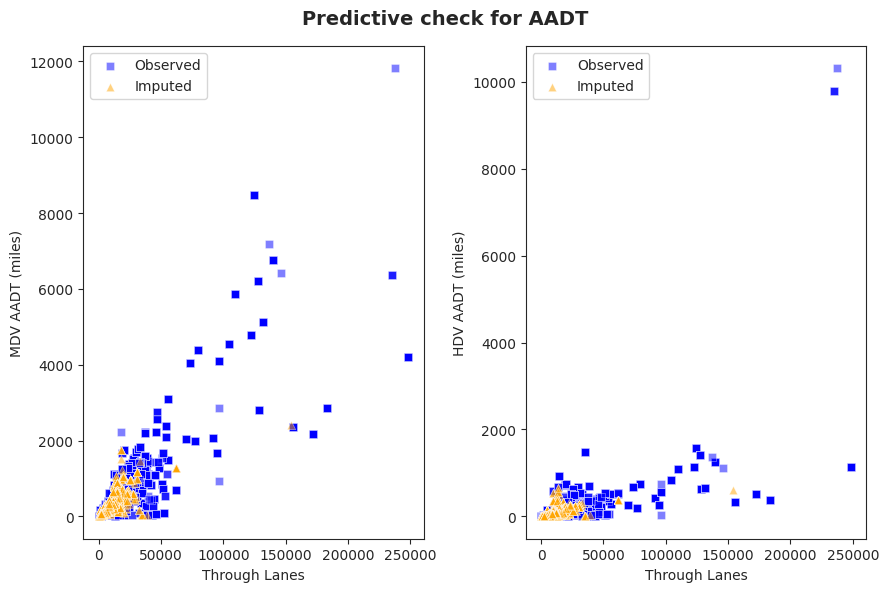

In [16]:
# Set the style to a nicer font
sns.set_style("ticks")

# Create the scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

# Scatter plot for MDV AADT
sns.scatterplot(data=observed_aadt_mdv, y='AADT_MDV', x='AADT', marker='s', color='blue', label='Observed', ax=ax1, alpha=0.5)
sns.scatterplot(data=imputed_aadt_mdv, y='AADT_MDV', x='AADT', marker='^', color='orange', label='Imputed', ax=ax1, alpha=0.5)
ax1.set_xlabel('Through Lanes')
ax1.set_ylabel('MDV AADT (miles)')
ax1.legend()

# Scatter plot for HDV AADT
sns.scatterplot(data=observed_aadt_hdv, y='AADT_HDV', x='AADT', marker='s', color='blue', label='Observed', ax=ax2, alpha=0.5)
sns.scatterplot(data=imputed_aadt_hdv, y='AADT_HDV', x='AADT', marker='^', color='orange', label='Imputed', ax=ax2, alpha=0.5)
ax2.set_xlabel('Through Lanes')
ax2.set_ylabel('HDV AADT (miles)')
ax2.legend()

# Centered title
fig.suptitle('Predictive check for AADT', fontsize=14, fontweight='bold')

# Adjust the layout
plt.tight_layout()

plt.savefig("../figs/aadt_aadt.png")
# Show the plot
plt.show()


In [1]:
import aadt_predictor as ap

OUTDIR = "./"
DATA_DIR = "../data/hpms_aadt_subset.csv"
RESPONSE_VARS = ['AADT_MDV', 'AADT_HDV']
RF_PREDICTOR_VARS = ["COUNTYFP", "F_SYSTEM", "THROUGH_LANES", "AADT"]
RANDOM_STATE = 42

predictor = ap.AADTPredictor(DATA_DIR, None, outdir = OUTDIR, random_state = RANDOM_STATE)

Loading data from ../data/hpms_aadt_subset.csv


/gpfs1/home/a/c/achawla1/main/TRC/NearRoadExposure/src/aadt_predictor.py:31: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data_full = pd.read_csv(self.data_path)


Full Data loaded successfully: 6598605 rows and 21 columns.
Pre-processing data...
ERROR: The data could not be subsetted. [None]
ERROR: The data could not be loaded. 'NoneType' object has no attribute 'shape'


In [20]:
# MDV
predictor.response_var = RESPONSE_VARS[0]
predictor.subset_train_data()
predictor.split_data(RF_PREDICTOR_VARS, state_fips = str(STATE), test_size=0.2)
predictor.initialize_model("Random Forest")
predictor.fit_model()

Training Data subsetted successfully with AADT_MDV: 4766630 rows and 21 columns.
Training and testing data split with test size 0.2 on State 11 and not stratified ...
Random Forest model initialized with- {}
Model trained successfully


In [21]:
y_pred_mdv = predictor.model.predict(predictor.X_test)
y_test_mdv = predictor.y_test 
residuals_mdv = y_test_mdv - y_pred_hdv

In [25]:
# HDV
predictor.response_var = RESPONSE_VARS[1]
predictor.subset_train_data()
predictor.split_data(RF_PREDICTOR_VARS, state_fips = str(STATE), test_size=0.2)
predictor.initialize_model("Random Forest")
predictor.fit_model()

Training Data subsetted successfully with AADT_HDV: 4766451 rows and 21 columns.
Training and testing data split with test size 0.2 on State 11 and not stratified ...
Random Forest model initialized with- {}
Model trained successfully


In [26]:
y_pred_hdv = predictor.model.predict(predictor.X_test)
y_test_hdv = predictor.y_test 
residuals_hdv = y_test_hdv - y_pred_hdv

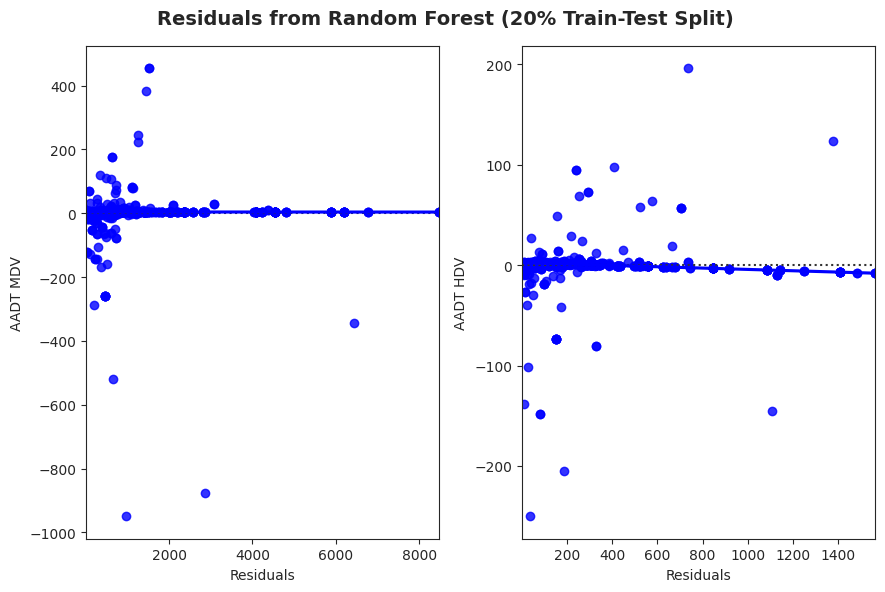

In [30]:
# Set the style to a nicer font
sns.set_style("ticks")

# Create the scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

# Scatter plot for MDV AADT
sns.residplot(x=y_test_mdv, y=residuals_mdv, lowess=True, color="blue", ax=ax1)
ax1.set_xlabel('Residuals')
ax1.set_ylabel('AADT MDV')

# Scatter plot for HDV AADT
sns.residplot(x=y_test_hdv, y=residuals_hdv, lowess=True, color="blue", ax=ax2)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('AADT HDV')

# # Centered title
fig.suptitle('Residuals from Random Forest (20% Train-Test Split)', fontsize=14, fontweight='bold')

# Adjust the layout
plt.tight_layout()

plt.savefig("../figs/aadt_residuals.png")
# Show the plot
plt.show()
